## Fuzzy Reasoning


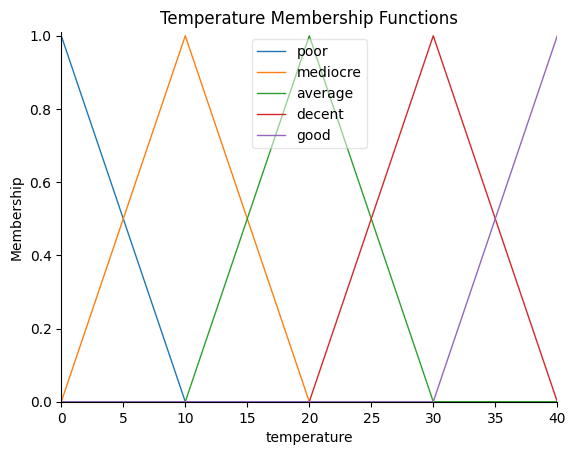

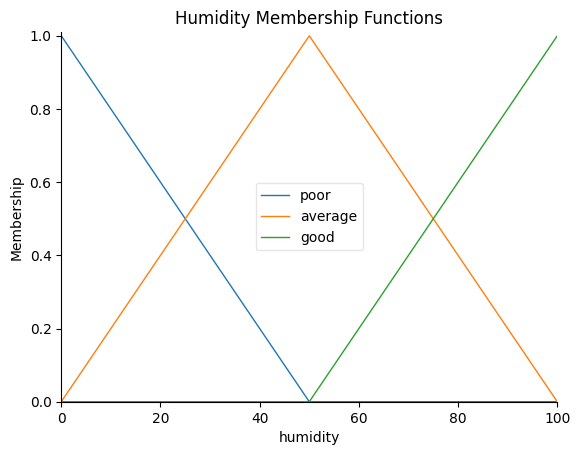

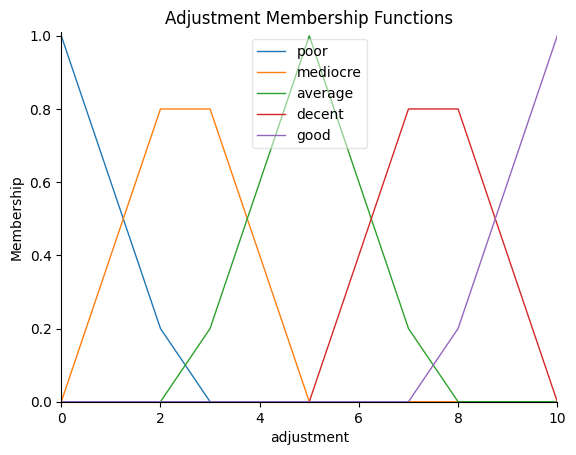

Adjustment Result:  1.0495780590717299


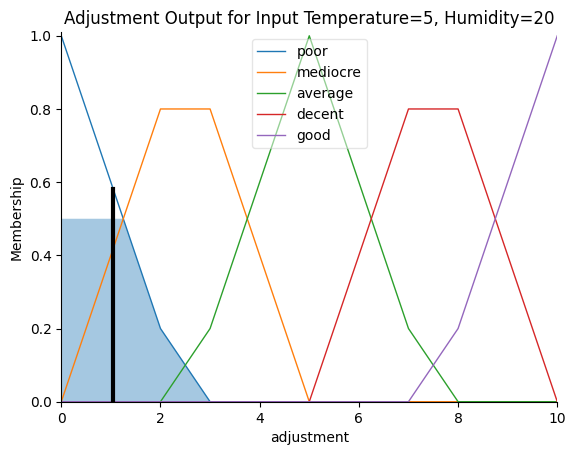

Adjustment Result:  1.0495780590717299


In [5]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')


humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')


adjustment = ctrl.Consequent(np.arange(0, 11, 1), 'adjustment')




temperature.automf(5)


humidity.automf(3)


adjustment.automf(5)


temperature.view()
plt.title("Temperature Membership Functions")
plt.show()


humidity.view()
plt.title("Humidity Membership Functions")
plt.show()

adjustment.view()
plt.title("Adjustment Membership Functions")
plt.show()




rule1 = ctrl.Rule(temperature['poor'] & humidity['poor'], adjustment['poor'])


rule2 = ctrl.Rule(temperature['poor'] & humidity['average'], adjustment['poor'])


rule3 = ctrl.Rule(temperature['poor'] & humidity['good'], adjustment['average'])


rule4 = ctrl.Rule(temperature['average'] & humidity['poor'], adjustment['average'])


adjustment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])


adjustment_simulation = ctrl.ControlSystemSimulation(adjustment_ctrl)



adjustment_simulation.input['temperature'] = 5
adjustment_simulation.input['humidity'] = 20


adjustment_simulation.compute()

print("Adjustment Result: ", adjustment_simulation.output['adjustment'])


adjustment.view(sim=adjustment_simulation)
plt.title("Adjustment Output for Input Temperature=5, Humidity=20")
plt.show()

print("Adjustment Result: ", adjustment_simulation.output['adjustment'])